In [1]:
import pandas as pd 
import numpy as np 

train_path = '../Datasets/ML Datasets/train.csv'
test_path = '../Datasets/ML Datasets/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [2]:
train.head()

,UserID,Price,Recency,SubDiffDay,Channel_MOBILE,Channel_WEB,PaymentType_Cash,PaymentType_Mobile Payment,PaymentType_Online Credit Card,Discount_No,...,Location_ADANA,Location_ANKARA,Location_ANTALYA,Location_BURSA,Location_ESKISEHIR,Location_ISTANBUL,Location_IZMIR,Location_KAYSERI,Location_TRABZON,Churned
0,500234730,28.575,517.0,5.0,2,0,2,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,500234752,482.550,139.0,1571.0,7,2,5,0,4,9,...,0,0,0,0,0,1,0,0,0,0
2,500234763,104.550,44.0,269.0,1,1,2,0,0,2,...,1,0,0,0,0,0,0,0,0,0
3,500234829,731.400,18.0,3206.0,15,1,11,4,1,16,...,0,0,0,0,1,0,0,0,0,0
4,500234840,69.000,395.0,0.0,0,2,0,0,2,2,...,0,0,0,0,0,0,1,0,0,1


#### Normality Testing

$H_0:$ Data is normal distributed  
$H_1:$ Data is not normal distributed

* Normality Test for Numeric Features

In [11]:
numeric_features = train.select_dtypes(include=[np.number])

In [19]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

print("---> NORMAL  DISTRIBUTED COLUMNS<---")
for col in numeric_features:
    p_value = shapiro(train[col])
    if p_value[1] > 0.05:
        print("• ",col)

---> NORMAL  DISTRIBUTED COLUMNS<---
•  SubDiffDay
•  Age


#### Check Correlations

In [42]:
corr = train.corr()

In [66]:
# choose the most correlated features between each other 
cols = ()
rows = ()

for col in corr:
    for row in corr:
        if corr[col][row] > 0.75 and corr[col][row] < 1:
            cols += (col,)
            rows += (row,)
            print(f"""
                  |Column     |{col}
                  |Row        |{row}
                  |Correlation|{np.round(corr[col][row],2)}
                  """)


                  |Column     |Price
                  |Row        |Discount_No
                  |Correlation|0.9
                  

                  |Column     |Recency
                  |Row        |Churned
                  |Correlation|0.91
                  

                  |Column     |Channel_MOBILE
                  |Row        |Discount_No
                  |Correlation|0.8
                  

                  |Column     |PaymentType_Cash
                  |Row        |Discount_No
                  |Correlation|0.77
                  

                  |Column     |Discount_No
                  |Row        |Price
                  |Correlation|0.9
                  

                  |Column     |Discount_No
                  |Row        |Channel_MOBILE
                  |Correlation|0.8
                  

                  |Column     |Discount_No
                  |Row        |PaymentType_Cash
                  |Correlation|0.77
                  

             

In [72]:
# get most correlated features
cols += rows
cols = list(set(cols))
cols

['Price',
 'Channel_MOBILE',
 'Churned',
 'PaymentType_Cash',
 'Recency',
 'Discount_No']

In [73]:
most_corr = train[cols].corr()

In [74]:
import plotly.express as px

fig = []

fig = px.imshow(most_corr, text_auto=True, aspect="auto", origin='lower')
fig.show()

• There are some highly correlated columns in dataframe

#### Hierarchical Clustering

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

data = np.array(train.fillna(-1))
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# generate the linkage matrix
Z = linkage(data_scaled, metric='euclidean', method='ward')
labels = train.index

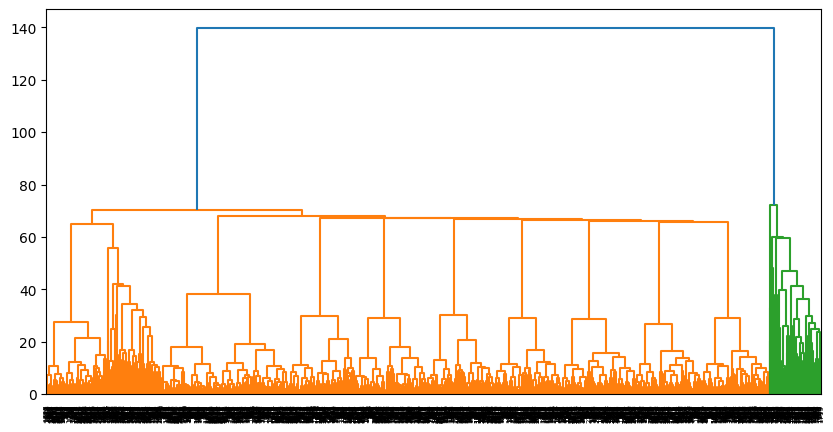

In [89]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.savefig('../Images/dendrogram.png')
plt.show()

#### Makine Öğrenmesi Modelleri

**1. ↘️ Karar Ağaçları (Decision Trees):**  
* Yüksek korelasyona sahip değişkenler mevcut ve bu durum lojistik regresyon modeli için sıkıntı yaratabilir. Karar ağaçları bu durumda daha iyi performans gösterebilir.  
* Karar ağaçları aynı zamanda değişkenler arasındaki ilişkileri anlamak için kullanışlıdır.  
* Karar ağaçları kolayca anlaşılabilen bir modeldir. Karar ağaçları modeli, kararlarımızı neden aldığımızı anlamak isteyen müşterilerimize de açıklayabiliriz. 

**2. ↘️ Rastgele Ormanlar (Random Forest):**  
* Rastgele ormanlar, yüksek boyutlu ve karmaşık veri setleri için genellikle iyi sonuçlar verir. Veri setimizde 38 değişken var ve rastgele ormanlar bu değişkenler arasındaki ilişkileri iyi bir şekilde ele alabilir.  
* Rastgele ormanlar aynı zamanda açıklayıcılık açısından da faydalıdır. Her bir karar ağacı için özellik önem derecelerini hesaplayarak, hangi özelliklerin modeldeki tahminler için en önemli olduğunu belirleyebiliriz.

**3. ↘️ Gradient Boosting (Gradient Boosted Trees):**  
* Gradient Boosting, yüksek boyutlu ve karmaşık veri setleri için de iyi sonuçlar verir.  
* Gradient Boosting aynı zamanda overfitting'i önlemek için de kullanılabilir. Bu durum, modelimizi daha genelleştirilebilir hale getirerek tahminlerin doğruluğunu artırabilir.  

Splitting Data

In [106]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [111]:
# fill missing values
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['SubDiffDay'] = train['SubDiffDay'].fillna(train['SubDiffDay'].median())

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['SubDiffDay'] = test['SubDiffDay'].fillna(test['SubDiffDay'].median())

veri setinden `Recency` değişkenini siliyorum. Çünkü hedef değişkenimizi ona göre belirledik. Eğer veri setimizin içierisinde bulundurursak modellerimiz öğrenmez ve sadece o değişkeni kullanarak sonuç üretirler.

In [112]:
train.drop(['Recency'], axis=1, inplace=True)
test.drop(['Recency'], axis=1, inplace=True)

In [113]:
X = train.drop('Churned', axis=1)
y = train['Churned']

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4 align="center"> Modellerin Değerlendirilmesinde Kullanılan Metrikler </h4>

$$Accuracy(Doğruluk) = \frac{\text{Doğru sınıflandırılan örnek sayısı}}{\text{Toplam örnek sayısı}}$$

$$Precision(Hassasiyet) = \frac{\text{Gerçek pozitiflerin sayısı}}{\text{Toplam pozitif tahminlerin sayısı}}$$

$$Recall(Duyarlılık) = \frac{\text{Gerçek pozitiflerin sayısı}}{\text{Toplam gerçek pozitiflerin sayısı}}$$

$$F1\text{ }Score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

* Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
dt_preds = dt.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_acc = accuracy_score(y_test, dt_preds)
dt_prec = precision_score(y_test, dt_preds)
dt_rec = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
print(f"""
        |Accuracy  |{dt_acc}
        |Precision |{dt_prec}
        |Recall    |{dt_rec}
        |F1-Score  |{dt_f1}
        """)


        |Accuracy  |0.7367256637168141
        |Precision |0.6294117647058823
        |Recall    |0.656441717791411
        |F1-Score  |0.6426426426426426
        


In [152]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, dt_preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.719224319103318

In [155]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines'))
fig.update_layout(title='Decision Tree ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  annotations=[go.layout.Annotation(x=0.90, y=0.1, showarrow=False,
                                                     text=f'AUC={roc_auc:.3f}',
                                                     font=dict(size=17, color='#E3011E'))])
fig.show()

* Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
rf_preds = rf.predict(X_test)

In [145]:
rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
print(f"""
        |Accuracy  |{rf_acc}
        |Precision |{rf_prec}
        |Recall    |{rf_rec}
        |F1-Score  |{rf_f1}
        """)


        |Accuracy  |0.7765486725663717
        |Precision |0.7183098591549296
        |Recall    |0.6257668711656442
        |F1-Score  |0.6688524590163935
        


In [156]:
fpr, tpr, thresholds = roc_curve(y_test, rf_preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.743679283333687

In [157]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines'))
fig.update_layout(title='Random Forest ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  annotations=[go.layout.Annotation(x=0.90, y=0.1, showarrow=False,
                                                     text=f'AUC={roc_auc:.3f}',
                                                     font=dict(size=17, color='#E3011E'))])
fig.show()

* Gradient Boosted Trees

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [159]:
gbc_preds = gbc.predict(X_test)

In [160]:
gbc_acc = accuracy_score(y_test, gbc_preds)
gbc_prec = precision_score(y_test, gbc_preds)
gbc_rec = recall_score(y_test, gbc_preds)
gbc_f1 = f1_score(y_test, gbc_preds)
print(f"""
        |Accuracy  |{gbc_acc}
        |Precision |{gbc_prec}
        |Recall    |{gbc_rec}
        |F1-Score  |{gbc_f1}
        """)


        |Accuracy  |0.7986725663716814
        |Precision |0.7857142857142857
        |Recall    |0.6073619631901841
        |F1-Score  |0.685121107266436
        


In [161]:
fpr, tpr, thresholds = roc_curve(y_test, gbc_preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.756968178826926

In [162]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines'))
fig.update_layout(title='Gradient Boosting Trees ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  annotations=[go.layout.Annotation(x=0.90, y=0.1, showarrow=False,
                                                     text=f'AUC={roc_auc:.3f}',
                                                     font=dict(size=17, color='#E3011E'))])
fig.show()

<hr>

<h3 align="center"> Model Test Sonuçları </h3>

<div align="center">

| Model | Accuracy | Precision | Recall | F1 Score | AUC |  
|:-----:|---------:|----------:|-------:|---------:|----:|
|Decision Tree|0.736|0.629|0.656|0.642|0.719|
|Random Forest|0.776|0.718|0.625|0.668|0.744|
|Gradient Boosting Trees|0.798|0.785|0.607|0.685|0.757|

</div>

<hr>